# Error Formulas for Polynomial Collocation

**References:**

- Section 3.2.1 *Interpolation error formula* in {cite}`Sauer`.
- Section 3.1 *Interpolation and the Lagrange Polynomial* in {cite}`Burden-Faires`.
- Section 4.2 *Errors in Polynomial Interpolation* in {cite}`Kincaid-Chenney`..

## Introduction

When a polynomial $P_n$ is given by collocation to $n+1$ points $(x_i, y_i)$, $y_i = f(x_i)$ on the graph of a function $f$, one can ask how accurate it is as an approximation of $f$ at points $x$ other than the nodes: what is the error $E(x) = f(x) - P(x)$?

As is often the case, the result is motivated by considering the simplest "non-trival case":
$f$ a polynomial of degree one too high for an exact fit, so of degree $n+1$.
The result is also analogous to the familiar error formula for Taylor polynonial approximations.

In [1]:
using PyPlot

In [2]:
include("NumericalMethods.jl")
using .NumericalMethods: polyfit, polyval

## Error in $P_n(x)$ collocating a polynomial of degree $n+1$

With $f(x) = c_{n+1} x^{n+1} + c_{n} x^{n} + \cdots + c_0$ a polynomial of degree $n+1$ and $P_n(x)$ the unique polynomial of degree at most $n$ that collocates with it at the $n+1$ nodes $x_0, \dots x_n$, the error

$$E_n(x) = f(x) - P(x)$$
is a polynomial of degree $n+1$ with all its roots known: the nodes $x_i$.
Thus it can be factorized as

\begin{align}
E_n(x) &= C (x-x_0) \cdot (x-x_1) \cdots (x-x_n)\\
       &= Cx^{n+1} + \text{lower powers of $x$.}
\end{align}

On the other hand, the only term of degree $x^{n+1}$ in $f(x) - P(x)$ is the leading term of $f(x)$, $c_{n+1} x^{n+1}$.
Thus $C = c_{n+1}$.

It will be convenient to note that the order $n+1$ derivative of $f$ is the constant
$f^{(n+1)}D^{n+1}f(x) = (n+1)! c_{n+1}$, so the error can be written as

$$E_n(x) = f(x) - P_n(x) = \frac{D^{n+1}f(x)}{(n+1)!} (x-x_0) \cdots (x-x_n)= \frac{D^{n+1}f(x)}{(n+1)!}\prod\limits_{i=0}^n (x - x_i).$$ (collocation-error-1)

## Error  in $P_n(x)$ when collocating with a sufficiently differentiable function

```{prf:theorem}
:label: collocation-error-formula

For a function $f$ with continuous derivative of order $n+1$ $D^{n+1}f$,
the polynomial $P_n$ of degree at most $n$ that fits the points $(x_i, f(x_i))$ $0 \leq i \leq n$ differs from $f$ by

$$E_n(x) = f(x) - P_n(x) = \frac{D^{n+1}f(\xi_x)}{(n+1)!}\prod\limits_{i=0}^n (x - x_i)$$ (collocation-error-2)

for some value of $\xi_x$ that is amongst the $n+2$ points $x_0, \dots x_n$ and $x$.

In particular, when $a \leq x_0 < x_1 \cdots < x_n \leq b$ and $x \in [a,b]$, then also $\xi_x \in [a, b]$.
```

```{prf:observation}
:label: comparison-to-taylor-error-formula

This is rather similar to the error formula for the Taylor polynomial $p_n$ with center $x_0$:

$$e_n(x) = f(x) - p_n(x) = \frac{D^{n+1}f(\xi)}{(n+1)!} (x-x_0)^{n+1},\, \text{some $\xi$ between $x_0$ and $x$.} $$(taylor-error)

This is effectively the limit of Equation {eq}`collocation-error-2` when all the $x_i$ congeal to $x_0$.
```

## Error bound with equally spaced nodes is $O(h^{n+1})$, but ...

An important special case is when there is a single parameter $h$ describing the spacing of the nodes; when they are the equally spaced values $x_i = a + i h$, $0 \leq i \leq n$, so that $x_0 = a$ and $x_n = b$ with $h = \displaystyle \frac{b-a}{n}$.
Then there is a somewhat more practically usable error bound:

```{prf:theorem}
:label: collocation-error-formula-equally-spaced-nodes

For $x \in [a,b]$ and the above equaly spaced nodes in that interval $[a,b]$,

$$| E_n(x) | = \left| f(x) - P_n(x)\right| \leq \frac{M_{n+1}}{n+1} h^{n+1}, = O(h^{n+1}),$$ (collocation-error-h)

where $M_{n+1} = \max\limits_{x \in [a,b]} | D^{n+1}f(x)|$.
```

## Possible failure of convergence

A major practical problem with this error bound is that is does not in general guarantee convergence
$P_n(x) \to f(x)$ as $n \to \infty$ with fixed interval $[a, b]$, because in some cases $M_{n+1}$ grows too fast.

A famous example is the "Witch of Agnesi" (so-called because it was introduced by Maria Agnesi,
author of the first textbook on differential and integral calculus).

In [3]:
agnesi(x) = 1.0/(1 + x^2);

In [4]:
function graph_agnesi_collocation(a, b, n)
    figure(figsize=[12, 6])
    title("The Witch of Agnesi and collocating polynomial of degree n=$n")
    x = range(a, b, 200)  # Plot 200 points as some fine detail is needed
    y = agnesi.(x)
    plot(x, y, label="Witch of Agnesi")
    xnodes = range(a, b, n+1)
    ynodes = agnesi.(xnodes)
    c = polyfit(xnodes, ynodes)
    P_n = polyval.(x, coeffs=c)
    plot(xnodes, ynodes, "r*", label="Collocation nodes")
    plot(x, P_n, label="P_$n(x)")
    legend()
    grid(true)

    figure(figsize=[12, 6])
    title("Error curve")
    E_n = P_n - y
    plot(x, E_n)
    grid(true)
end;

Start with $n=4$, which seems somewhat well-behaved:

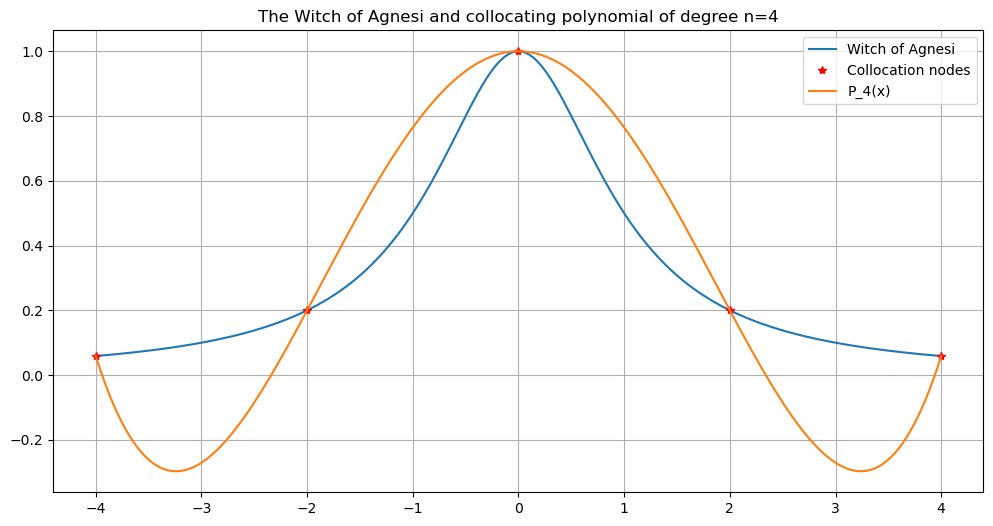

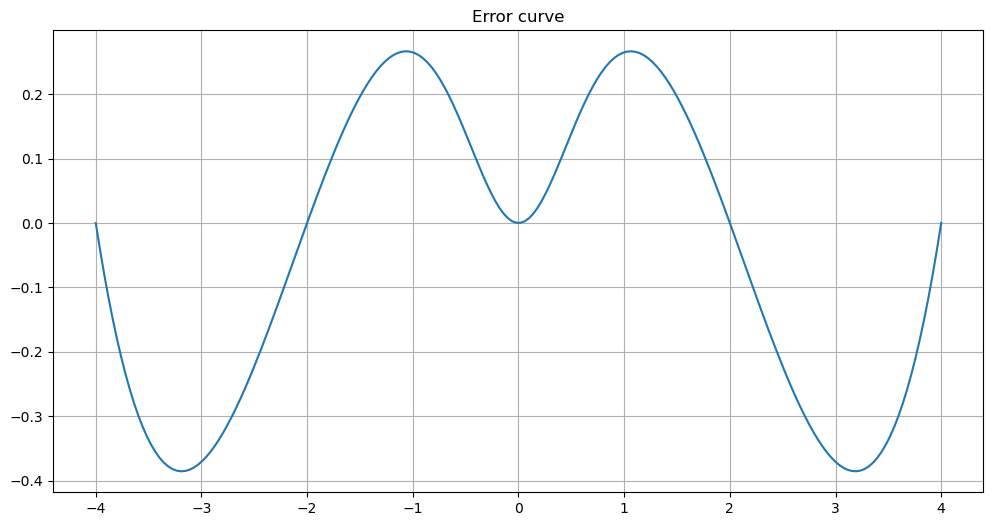

In [5]:
graph_agnesi_collocation(-4.0, 4.0, 4)

Now increase the number of inervals, doubling each time.

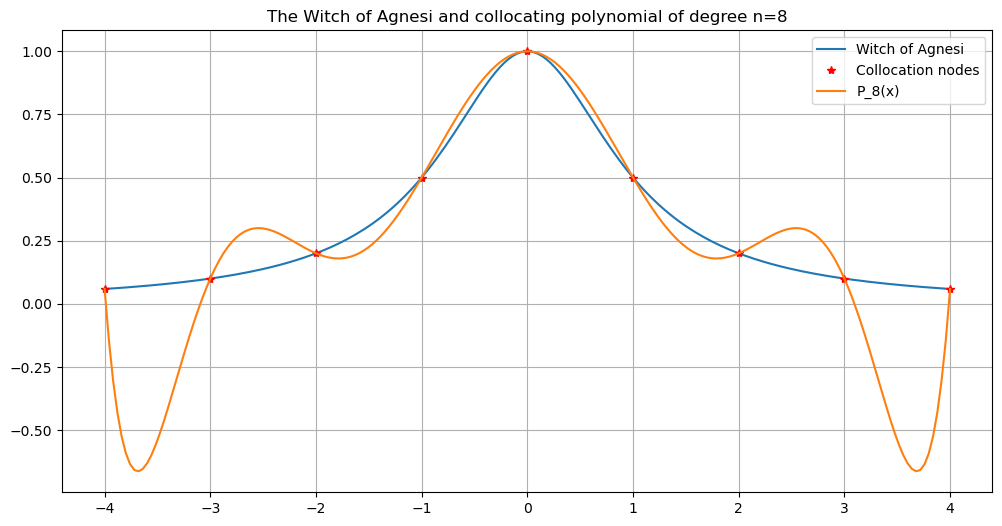

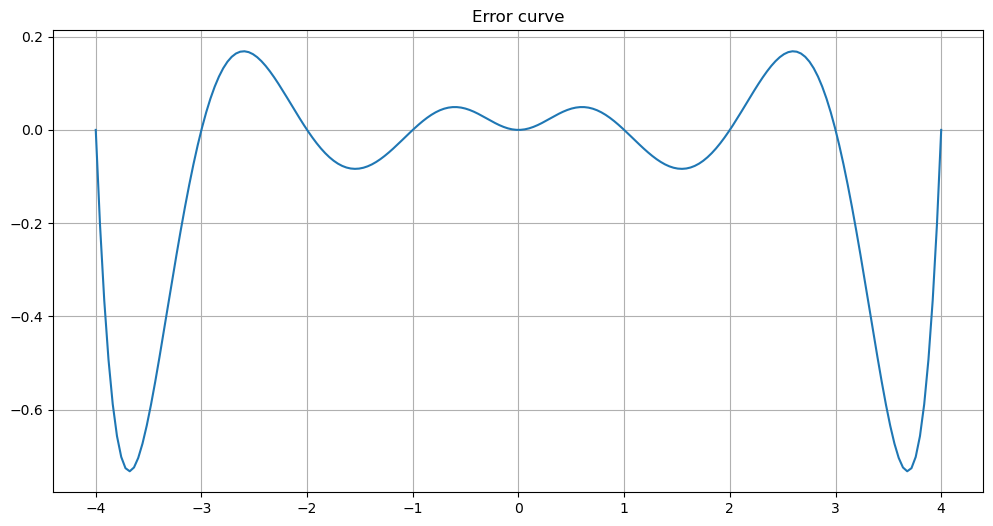

In [6]:
graph_agnesi_collocation(-4.0, 4.0, 8)

The curve fits better in the central part, but gets worse towards the ends!

One hint as to why is to plot the polynomial factor in the error formula above:

In [7]:
function graph_error_formula_polynomial(a, b, n)
    figure(figsize=[12, 6])
    title("The polynomial factor in the error formula for degree $n")
    n_plot_points = 200
    x = range(a, b, n_plot_points)
    x_nodes = range(a, b, n+1)
    polynomial_factor = ones(n_plot_points)
    for x_node in x_nodes
        polynomial_factor .*= (x .- x_node)
    end
    plot(x, polynomial_factor)
    grid(true)
end;

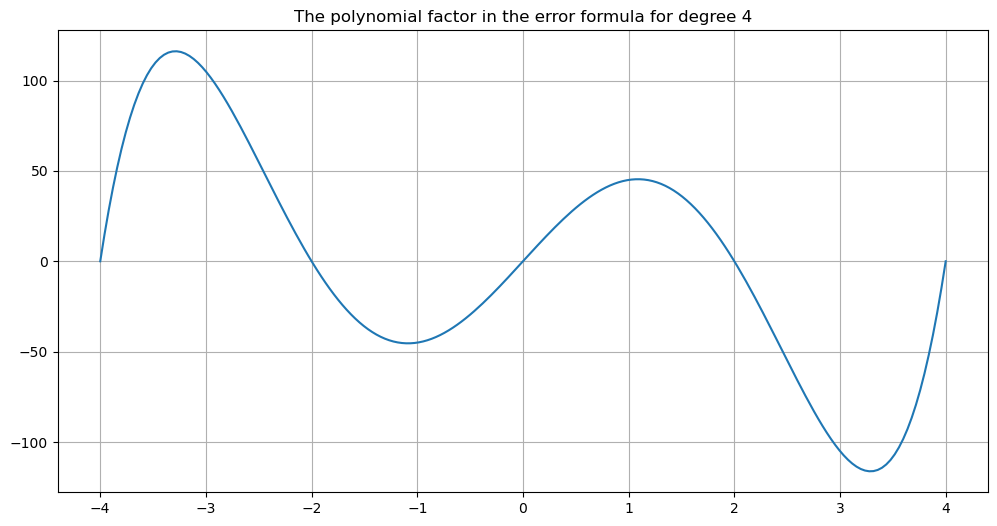

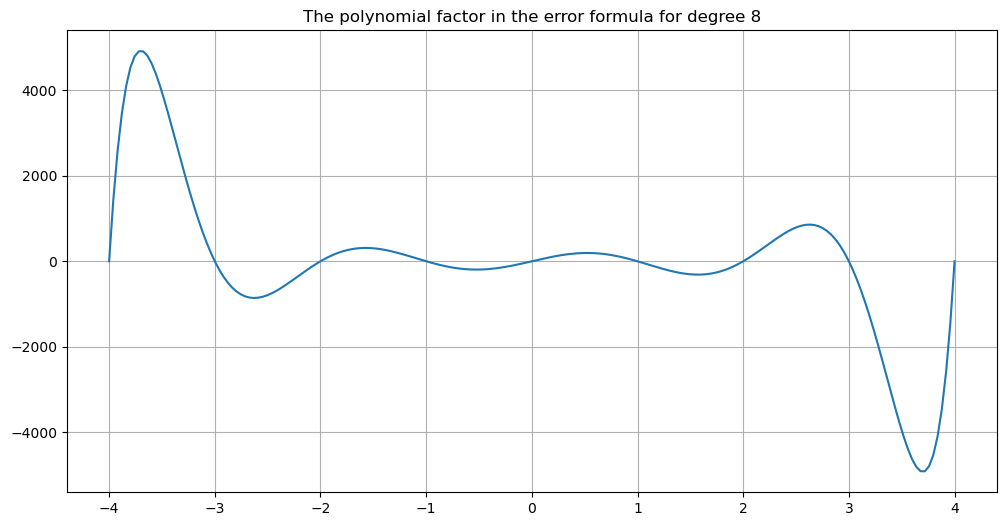

In [8]:
graph_error_formula_polynomial(-4.0, 4.0, 4)
graph_error_formula_polynomial(-4.0, 4.0, 8)

As n increases, it just gets worse:

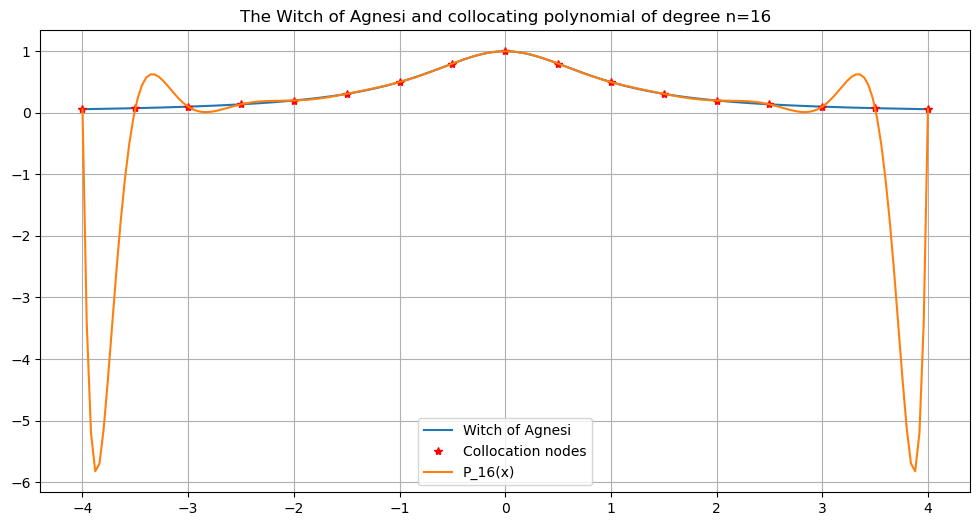

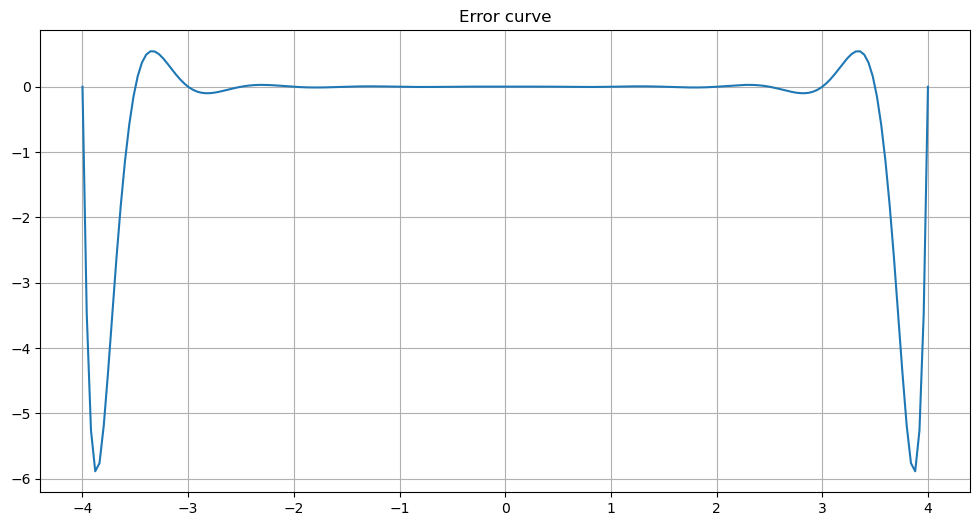

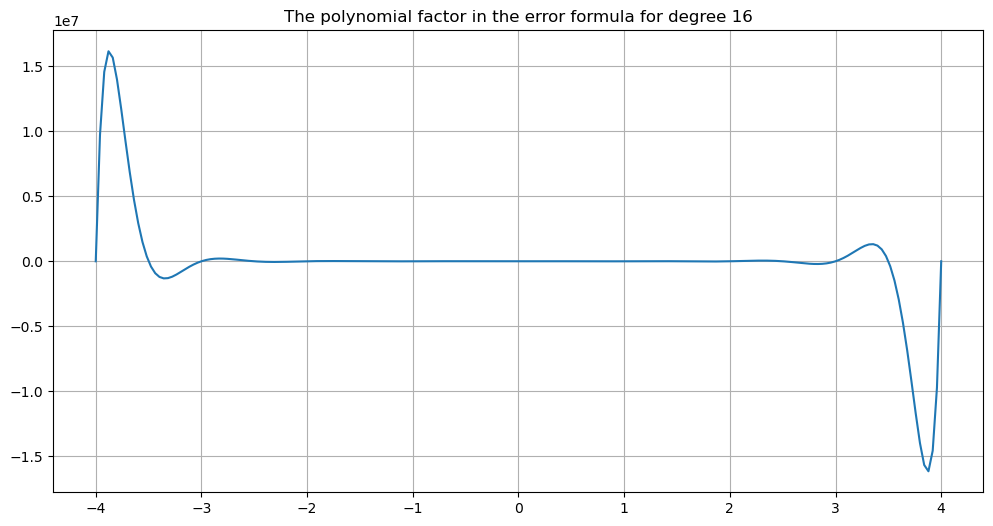

In [9]:
graph_agnesi_collocation(-4.0, 4.0, 16)
graph_error_formula_polynomial(-4.0, 4.0, 16)

## Two solutions: piecewise interpolation and least squares approximation

The approach of least squares approximation is introduced in the next section {doc}`least-squares-fitting`;
that can be appropriate when the original data is not exact (due ot measureknet eror in an experiment, for example)
so a good approximation at each node can be more appropriate than exact collocation at each but with implausable behavior between the nodes.

When instead exact collocation is sought, piecewise interpolation is typically used.
This involves collocation with multiple polynomials of a fixed degree, ech on a prt of the domain.
Then for each such polynomial $M_{m+1}$ in the above error formula is independnt of the number $N$ of nodes and
with the nodes on interval $[a, b]$ at equal spacing $h = (b-a)/(N-1)$, one has the convergence result

$$
| E_m(x) \leq \frac{M_{m+1}}{m+1} h^{m+1} = O(h^{m+1}) = O \left( \frac{1}{N^{m+1}} \right), \to 0 \text{ as } N \to \infty.
$$

This only requires that $f$ has a continuous derivatives up to order $m+1$.

The simplest case of this — quite often used in comuter graphics, including `PyPlot.plot` —
is to divide the domain into $N-1$ sub-intervals of equal width separated by nodes
$x_i = a + i h$, $0 \leq i \leq n$, and then approximate $f(x)$ *linearly* on each sub-interval by using the two surrounding nodes $x_i$ and $x_{i+1}$ determined by having $x_i \leq x \leq x_{i+1}$:
this is **piecewise linear interpolation.**

This gives the approximating function $L_N(x)$,
and the above error formula, now with $m=1$, says that the worst absolute error anywhere in the interval $[a, b]$ is

$$
|E_2(x)| = |f(x) - L_N(x)| \leq \frac{M_2}{2} h^2, \quad M_2 = \max\limits_{x \in [a,b]} | f''(x)|.
$$

Thus for any $f$ that is is twice continuously differentiable the error at each $x$-value converges to zero as $N \to \infty$.
Further, it is *uniform convergence*: the maximum error over all points in the domain goes to zero.

### Preview: definite integrals (en route to solving differential equations)

Integrating this piecewise linear approximation over interval $[a, b]$ gives the Compound Trapezoid Rule approximation of $\int_a^b f(x) dx$.
As we will soon see, this also has error at worst $O(h^2), = O(1/N^2)$:
each doubling of effort reduces errors by a factor of about four.

Also, you might have heard of Simpson's Rule for approximating definite integrals (and anyway, you will soon!):
that uses piecewise quadratic interpolation and we will see that this improves the errors to $O(h^4), = O(1/N^4)$:
each doubling of effort reduces errors by a factor of about 16.

```{prf:remark} Computer graphics and smoother approximating curves
:label: 

As mentioned, computer graphics often draws graphs from data points this way, most often with either piecewise linear or piecewise cubic ($m=3$) approximation.

However, this can give sharp "corners" at the nodes, so many modes are needed to make this visually acceptable.
That is unavoidable with piecewise linear curves, but for higher degrees there are modifications of this strategy that give smoother curves: piecewise cubics turn out to work very nicely for that, and these are inroduced in the section {doc}`piecewise-polynomial-approximation-and-splines`.
```